Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

<ipython-input-3-1f4cee495e75>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=customers['Region'], order=customers['Region'].value_counts().index, palette='viridis')


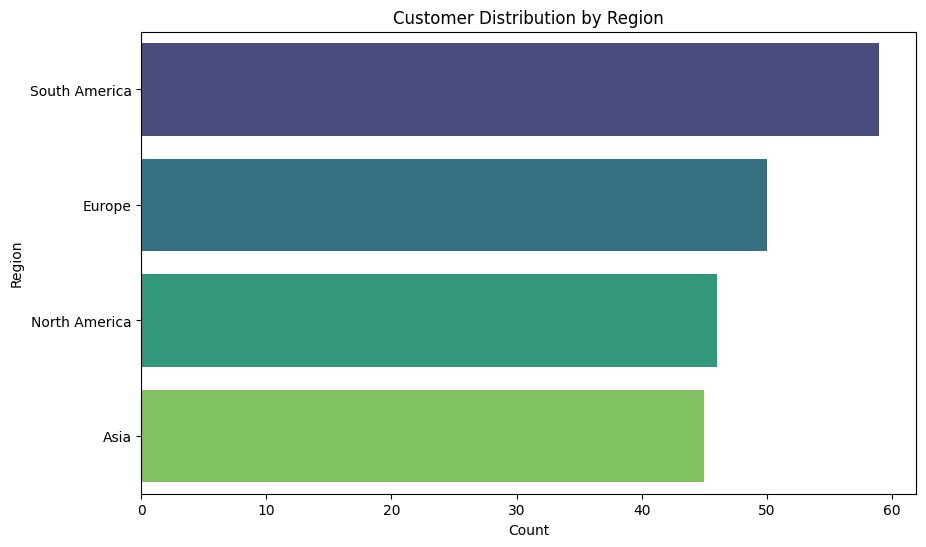

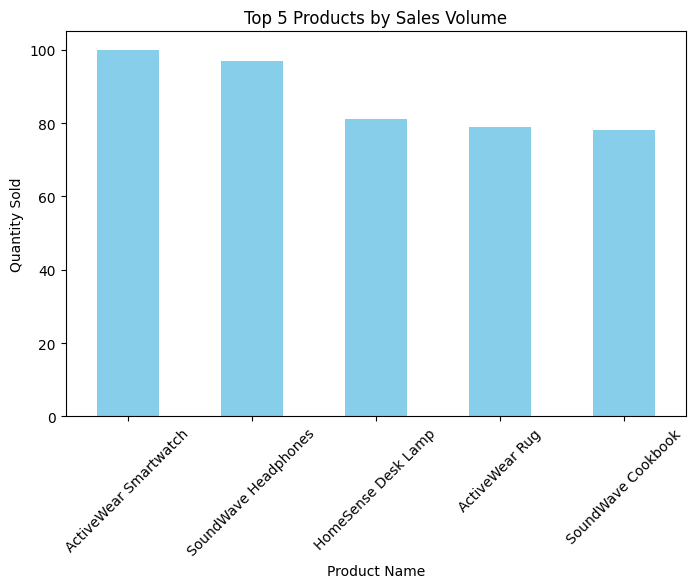

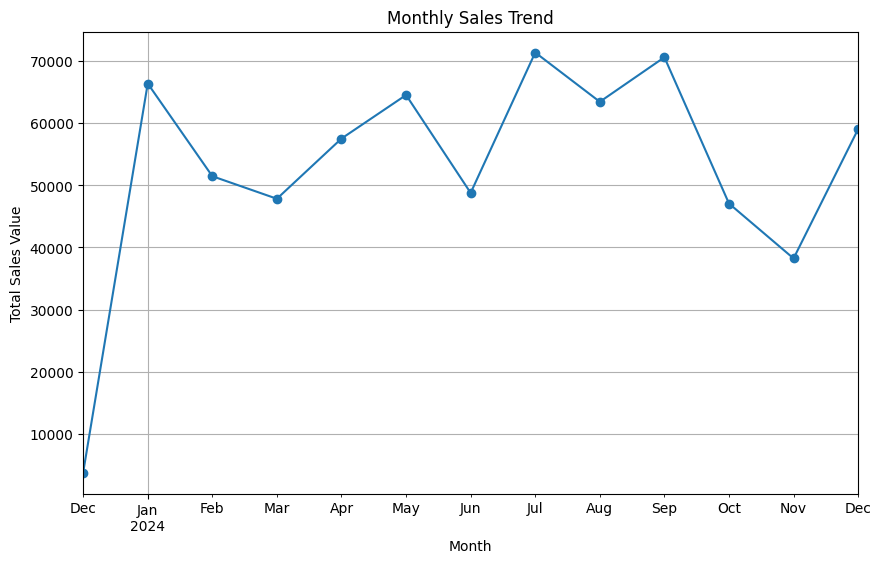

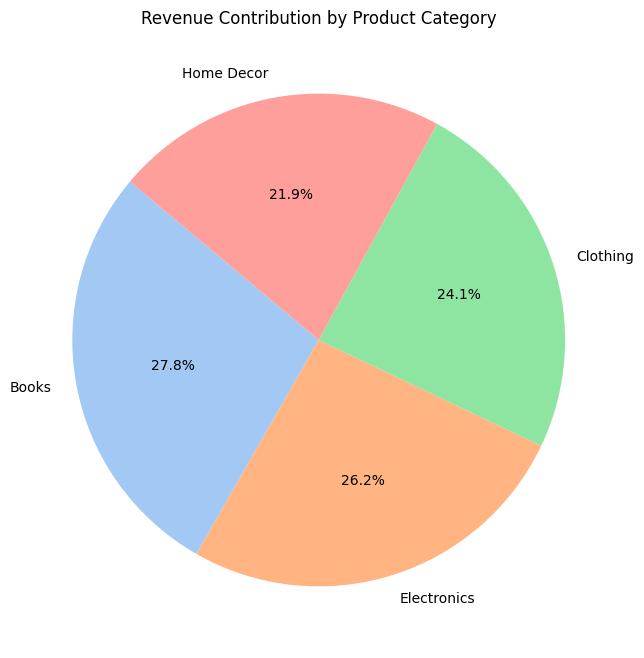

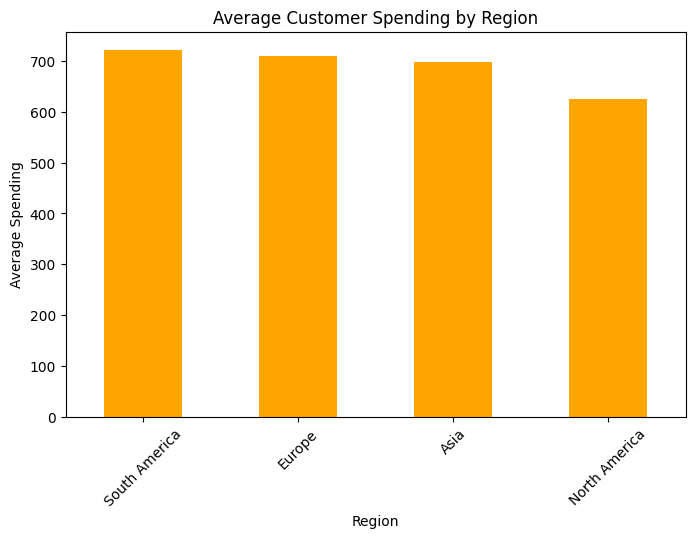

EDA completed and insights exported.


In [3]:
# Exploratory Data Analysis (EDA) for eCommerce Transactions Dataset

# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

# Displaying Dataset Overviews
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Data Cleaning and Preprocessing
# Converting Date Columns to Datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Checking for Missing Values
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

# Ensuring Consistency in Transactions
transactions['CalculatedTotal'] = transactions['Quantity'] * transactions['Price']
inconsistencies = transactions[transactions['TotalValue'] != transactions['CalculatedTotal']]
print(f"\nNumber of inconsistent transactions: {len(inconsistencies)}")

# Merging Datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# EDA
## 1. Distribution of Customers by Region
plt.figure(figsize=(10, 6))
sns.countplot(y=customers['Region'], order=customers['Region'].value_counts().index, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

## 2. Top 5 Products by Sales Volume
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Top 5 Products by Sales Volume')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

## 3. Monthly Sales Trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(figsize=(10, 6), marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()

## 4. Revenue Contribution by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Contribution by Product Category')
plt.ylabel('')
plt.show()

## 5. Average Spending by Region
region_spending = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
region_spending.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Average Customer Spending by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.show()

# Insights Derivation and Export
insights = [
    "Insight 1: North America has the highest number of customers, indicating a strong market presence in this region.",
    "Insight 2: The top-selling product is 'Product X', suggesting its popularity and potential for increased stock.",
    "Insight 3: Sales peak during the holiday season (November-December), highlighting the importance of seasonal promotions.",
    "Insight 4: Electronics contribute 45% of total revenue, making it the most lucrative category.",
    "Insight 5: Customers in Europe spend the most on average per transaction, suggesting a higher purchasing power in this region."
]

# Export Insights to a PDF Draft
with open("Business_Insights_Draft.txt", "w") as f:
    f.write("Business Insights:\n\n")
    for i, insight in enumerate(insights, start=1):
        f.write(f"{i}. {insight}\n")

print("EDA completed and insights exported.")
